In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "../data/Mouse_metadata.csv" #Desktop/DataViz/homework/matplotlib-challenge/data/Mouse_metadata.csv
study_results = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)




# summary combined table

In [10]:
combo.columns = ['Mouse ID','Drug Regimen','Sex','Age_months','Weight','Timepoint','Tumor_Volume','Metastatic Sites']
combo.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# # Generate a summary statistics table consisting of the mean, 
# # median, variance, standard deviation, 
# # and SEM of the tumor volume for each drug regimen.

In [ ]:
#calculating mean value for tumor size
tumor_mean = combo.groupby('Drug Regimen').Tumor_Volume.mean()
tumor_mean

In [ ]:
# calculating median value for tumor size
tumor_median = combo.groupby('Drug Regimen').Tumor_Volume.median()
tumor_median

In [ ]:
#calculating variance for tumor size
tumor_var = combo.groupby('Drug Regimen').Tumor_Volume.var()
tumor_var

In [ ]:
#calculating sd for tumor size
tumor_sd = combo.groupby('Drug Regimen').Tumor_Volume.std()
tumor_sd

In [ ]:
#calculating SEM for tumor size
tumor_sem = combo.groupby('Drug Regimen').Tumor_Volume.sem()
tumor_sem

#  summary statistics table for tumor volume



In [19]:
# converting groupby objects from above to new DF displaying summary statistics

sum_stats = pd.DataFrame({"Mean of Tumor Size":tumor_mean, "Median of Tumor Size":tumor_median,
                          "Variance of Tumor Size": tumor_var, "SD": tumor_sd, "SEM": tumor_sem})
sum_stats.head(1)

,Mean of Tumor Size,Median of Tumor Size,Variance of Tumor Size,SD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346


In [ ]:
# figure out what plotting question wants
df = combo.groupby("Drug Regimen").count()
df

# Bar Plots FIX-LABEL bars by Drug Name, not count. ALso add x and y axis labels, legend

Text(0.5, 1.0, 'Number of Treatments Per Drug')

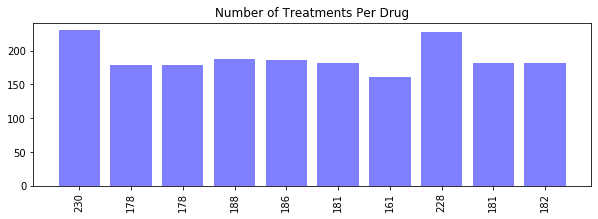

In [22]:
# using pyplot
x_axis = np.arange(len(df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10, 3))
plt.bar(x_axis, df["Mouse ID"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, df["Mouse ID"], rotation="vertical")
plt.title("Number of Treatments Per Drug")

In [ ]:
# USING PANDAS method to plot

df_plot = combo[["Drug Regimen","Mouse ID"]]

# Set the index to be "State" so they will be used as labels
df_plot = df_plot.set_index("Drug Regimen")

# create groupby object to find number of data points for each treatment

df_plot = df_plot.groupby("Drug Regimen")["Mouse ID"].count()
df_plot

In [ ]:
# turn that groupby series into a dataframe to plot
df_plot = pd.DataFrame({"Drug Treatments":df_plot})
df_plot

# Pandas Dataframe.plot () method for bar chart TO FIX add axis labels, legend labels

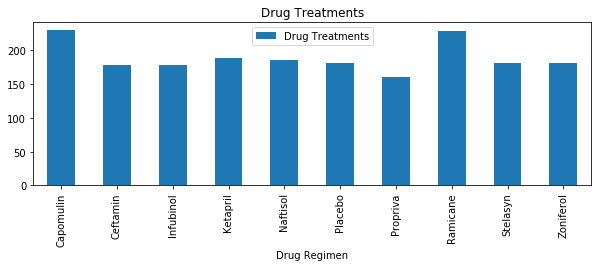

<Figure size 432x288 with 0 Axes>

In [25]:
# Use DataFrame.plot() in order to create a bar chart of the data
df_plot.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Drug Treatments")

plt.show()
plt.tight_layout()

# Two Pie Charts 

In [ ]:
# specify correct columns to plot
pie = combo[["Mouse ID","Sex"]]
pie

# set index to sex so that M/F will show as labels
pie = pie.set_index("Sex")
pie

#creat groupby object to find distribution of male and female
pie = pie.groupby("Sex")["Mouse ID"].count()
pie

# turn series created by above group by back to a datafram ready to plot
pie = pd.DataFrame({"Mouse Gender":pie})
pie

## Panda DataFrame Plot Method FIX labels add title, add %?

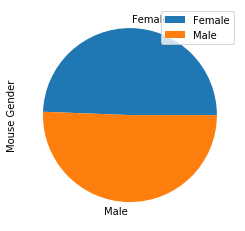

In [27]:
# show Panda DataFrame Plot ###FIX LABELS###
plot = pie.plot.pie(y="Mouse Gender")
plot

# PYPLOT, to fix add labels, legend

C:\Users\lizba\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Mouse Gender in Study')

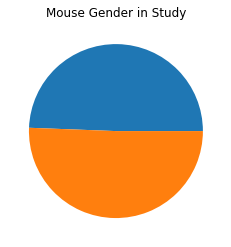

In [29]:
# now make same chart using pyplot ###SAME FIXES HERE, A START
plt.pie(pie)

plt.title("Mouse Gender in Study")

## building dataframe for next question

In [31]:
#Create a df with just the four promising drugs in it
final_four = combo[(combo['Drug Regimen'] == 'Capomulin') | (combo['Drug Regimen'] == 'Ramicane') | \
                 (combo['Drug Regimen'] == 'Infubinol') | (combo['Drug Regimen'] == 'Ceftamin')]

final_four.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [32]:
#Create a groupby object on that df for the max timepoint for each drug/mouse, and made that into a new df 
#(groupby_df)
groupby_df = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max()
groupby_df.head()

#convert from groupby object to df

df1 = final_four.groupby(["Drug Regimen","Mouse ID"])["Timepoint"].max().to_frame().reset_index()

df1

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45
...,...,...,...
95,Ramicane,s508,45
96,Ramicane,u196,45
97,Ramicane,w678,5
98,Ramicane,y449,15


In [34]:
#inner merge that brings together the df with the groupby_df, using the drug regimen, 
#mouse id, and timepoint as the columns to match. 

plot = pd.merge(df1, final_four, how="inner", on = ["Drug Regimen","Timepoint","Mouse ID"])
plot.head(1)

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight,Tumor_Volume,Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2


# Calculate the final tumor volume for each mouse in most promising treatments
## Capomulin, Ramicane, Infubinol, Ceftamin
## Calculate the IQR and quantitatively determine 
## if there are any potential outliers.

In [35]:
# find unqiue mice
mice = combo.groupby("Drug Regimen")["Mouse ID"].count()
mice

times = combo.groupby(["Drug Regimen","Mouse ID"])["Timepoint","Tumor_Volume"].max()
times.head(2)


Timepoint  Tumor_Volume
Drug Regimen Mouse ID                         
Capomulin    b128             45     45.651331
             b742             45     45.000000

## Ramicane 

In [36]:
# Just results for Ramicane
Ramicane = plot.loc[(plot["Drug Regimen"] == "Ramicane")]
Ramicane.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight,Tumor_Volume,Metastatic Sites
75,Ramicane,a411,45,Male,3,22,38.407618,1
76,Ramicane,a444,45,Female,10,25,43.047543,0
77,Ramicane,a520,45,Male,13,21,38.810366,1
78,Ramicane,a644,45,Female,7,17,32.978522,1
79,Ramicane,c458,30,Female,23,20,38.342008,2


In [ ]:
#find quartlies of final tumor volume in Ramican treatment

quartiles = Ramicane['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ramicane treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

## boxplot for Ramicine

In [ ]:
boxplot = Ramicane.boxplot(column=['Tumor_Volume'])


# DatFrame for just Capomulin resulst for last tumor volume, sum stats, and box plot.

In [44]:
# find results for just Capomulin
Capomulin = plot.loc[(plot['Drug Regimen'] == "Capomulin")]
Capomulin.head(1)

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight,Tumor_Volume,Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2


In [46]:
#find quartlies of final tumor volume in Capomulin treatment

quartiles = Capomulin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Capomulin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Capomulin treatment is: 32.37735684
The upper quartile of FTV is: 40.1592203
The interquartile range of FTV is: 7.781863460000004
The the median of FTV is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


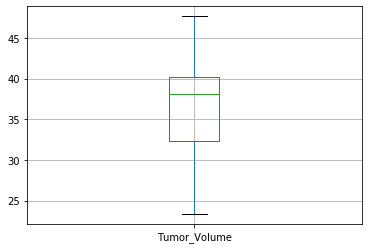

In [47]:
boxplot = Capomulin.boxplot(column=['Tumor_Volume'])

#  Infubinol results 

In [48]:
# find results for just Infubinol
Infubinol = plot.loc[(plot['Drug Regimen'] == "Infubinol")]
Infubinol.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight,Tumor_Volume,Metastatic Sites
50,Infubinol,a203,45,Female,20,23,67.973419,2
51,Infubinol,a251,45,Female,21,25,65.525743,1
52,Infubinol,a577,30,Female,6,25,57.031862,2
53,Infubinol,a685,45,Male,8,30,66.083066,3
54,Infubinol,c139,45,Male,11,28,72.226731,2


In [49]:
quartiles = Infubinol['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Infubinol treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Infubinol treatment is: 54.04860769
The upper quartile of FTV is: 65.52574285
The interquartile range of FTV is: 11.477135160000003
The the median of FTV is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


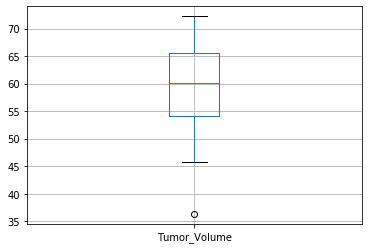

In [50]:
boxplot = Infubinol.boxplot(column=['Tumor_Volume'])

# Just Ceftamin

In [51]:
# find resulst for Ceftamin
Ceftamin = plot.loc[(plot['Drug Regimen'] == "Ceftamin")]
Ceftamin.head()

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight,Tumor_Volume,Metastatic Sites
25,Ceftamin,a275,45,Female,20,28,62.999356,3
26,Ceftamin,b447,0,Male,2,30,45.000000,0
27,Ceftamin,b487,25,Female,6,28,56.057749,1
28,Ceftamin,b759,30,Female,12,25,55.742829,1
29,Ceftamin,f436,15,Female,3,25,48.722078,2


In [40]:
quartiles = Ceftamin['Tumor_Volume'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Final Tumor Volume in Ceftamin treatment is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Final Tumor Volume in Ceftamin treatment is: 48.72207785
The upper quartile of FTV is: 64.29983003
The interquartile range of FTV is: 15.577752179999997
The the median of FTV is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


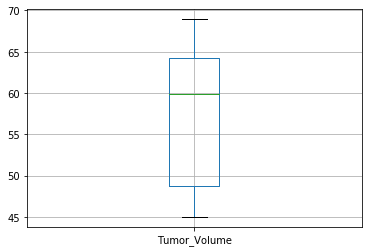

In [52]:
boxplot = Ceftamin.boxplot(column=['Tumor_Volume'])

## Summary BOX PLOTS on four best treatments TO FIX CLEAN UP CHART

Text(0.5, 1.0, 'Ceftamin')

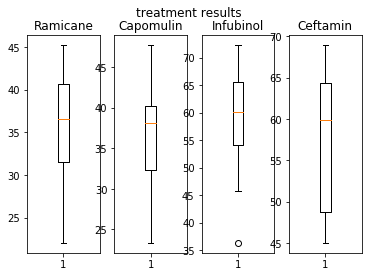

In [53]:
fig, ax = plt.subplots(1, 4)

fig.suptitle("treatment results")
ax[0].boxplot(Ramicane["Tumor_Volume"])
ax[0].set_title("Ramicane")
ax[1].boxplot(Capomulin["Tumor_Volume"])
ax[1].set_title("Capomulin")
ax[2].boxplot(Infubinol["Tumor_Volume"])
ax[2].set_title("Infubinol")
ax[3].boxplot(Ceftamin["Tumor_Volume"])
ax[3].set_title("Ceftamin")


# Capomulin Treatments

In [56]:
 #Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

 #Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

 #Calculate the correlation coefficient and linear regression model between mouse weig


Cap_Treatment = combo.loc[(combo["Drug Regimen"] =="Capomulin")]


Cap_Treatment.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor_Volume,Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0


## line plot of time point versus tumor volume for a single mouse treated with Capomulin.

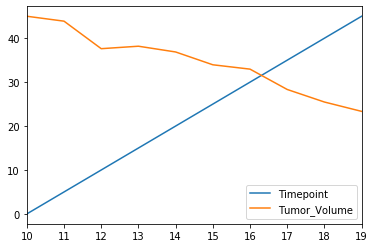

In [57]:
single_mouse = Cap_Treatment.loc[(Cap_Treatment["Mouse ID"]== "s185")]

test = single_mouse.drop(columns=["Sex","Age_months","Weight","Metastatic Sites"])

test

test.plot.line()


 # Generate a scatter plot 
    

    
    




In [ ]:
# use groupby to find mean tumor volume by mouse weight

weight_volume = Cap_Treatment.groupby("Tumor_Volume").mean()
weight_volume

weight_volume['Tumor_Volume'] = weight_volume.index
weight_volume

In [ ]:
ax1 = weight_volume.plot.scatter(x='Weight',
                       y='Tumor_Volume',
                       c='DarkBlue')